In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
files.upload();

Saving vgames2.csv to vgames2 (3).csv


In [211]:
df = pd.read_csv('vgames2.csv')

In [212]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [213]:
#불필요한 컬럼 제거
df = df.drop('Unnamed: 0', axis='columns')

In [214]:
#데이터 결측치 및 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [215]:
# 중복값 확인
duplicates = df[df.duplicated(['Name'])]
duplicates

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
131,Call of Duty 4: Modern Warfare,PC,2007.0,Shooter,Activision,0,1.12,0,0.03
230,IL-2 Sturmovik: Birds of Prey,DS,2009.0,Simulation,505 Games,0.06,0,0,0
250,NASCAR Unleashed,3DS,2011.0,Racing,Activision,0.18,0,0,0.01
279,The Incredibles: Rise of the Underminer,XB,2005.0,Action,THQ,0.06,0.02,0,0
343,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16
...,...,...,...,...,...,...,...,...,...
16591,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [216]:
df[df.Name == 'NBA 2K12'] #platform이 다르므로 다른 게임인 것을 확인 -> 중복값 없음

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
270,NBA 2K12,PSP,2011.0,Sports,Take-Two Interactive,0.22,0.03,0,0.03
343,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16
6929,NBA 2K12,PS3,2011.0,Sports,Take-Two Interactive,1610K,0.27,0.05,0.18
9112,NBA 2K12,PC,2011.0,Sports,Take-Two Interactive,0.09,0.05,0,0.02
15533,NBA 2K12,Wii,2011.0,Sports,Take-Two Interactive,0.3,0.03,0,0.02


In [217]:
#결측값 제거
df = df.dropna(axis=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [218]:
df.reset_index()
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [219]:
df['NA_Sales'].unique() #K,M 등 단위 통일하기

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

In [220]:
df.describe()

,Year
count,16241.000000
mean,1994.178437
std,155.484265
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [221]:
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [222]:
#단위 제거 함수 선언
def fix_columns(col):
    temp_list = []

    for i in col:
        temp = float(i.replace("K",""))
        temp_list.append(temp)

    return temp_list
    

In [223]:
#단위 제거 함수 선언
def fix_columns_1(col):
    temp_list = []

    for i in col:
        temp = float(i.replace("M",""))
        temp_list.append(temp)

    return temp_list

In [224]:
#NA_Sales column에서 단위(K)가 붙어있는 데이터만 호출하여 데이터프레임을 구성하고 les 변수에 저장  
les = df.loc[df.NA_Sales.str.contains('K', na=False)]
 
#les 변수에서 단위를 지워줄 NA_Sales columns을 단위 제거 함수에 적용
les['NA_Sales'] = fix_columns(les['NA_Sales'])
 
#단위를 제거한 column에 단위변환가중치를 곱함
les['NA_Sales'] = les['NA_Sales']*1000
 
#원본 데이터프레임에서 단위가 붙어있는 column의 데이터값을 부른 후, 가중치를 곱했던 les 값으로 대체
df['NA_Sales'].loc[df.NA_Sales.str.contains('K', na=False)] = les['NA_Sales']

#NA_Sales column에서 단위(M)가 붙어있는 데이터만 호출하여 데이터프레임을 구성하고 les_1 변수에 저장  
les_1 = df.loc[df.NA_Sales.str.contains('M', na=False)]
 
#les_1 변수에서 단위를 지워줄 NA_Sales columns을 단위 제거 함수에 적용
les_1['NA_Sales'] = fix_columns_1(les_1['NA_Sales'])
 
#단위를 제거한 column에 단위변환가중치를 곱함
les_1['NA_Sales'] = les_1['NA_Sales']*1000000
 
#원본 데이터프레임에서 단위가 붙어있는 column의 데이터값을 부른 후, 가중치를 곱했던 les_1 값으로 대체
df['NA_Sales'].loc[df.NA_Sales.str.contains('M', na=False)] = les_1['NA_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [225]:
#EU_Sales column에서 단위(K)가 붙어있는 데이터만 호출하여 데이터프레임을 구성하고 les 변수에 저장  
les = df.loc[df.EU_Sales.str.contains('K', na=False)]
 
#les 변수에서 단위를 지워줄 EU_Sales columns을 단위 제거 함수에 적용
les['EU_Sales'] = fix_columns(les['EU_Sales'])
 
#단위를 제거한 column에 단위변환가중치를 곱함
les['EU_Sales'] = les['EU_Sales']*1000
 
#원본 데이터프레임에서 단위가 붙어있는 column의 데이터값을 부른 후, 가중치를 곱했던 les 값으로 대체
df['EU_Sales'].loc[df.EU_Sales.str.contains('K', na=False)] = les['EU_Sales']

#EU_Sales column에서 단위(M)가 붙어있는 데이터만 호출하여 데이터프레임을 구성하고 les_1 변수에 저장  
les_1 = df.loc[df.EU_Sales.str.contains('M', na=False)]
 
#les_1 변수에서 단위를 지워줄 EU_Sales columns을 단위 제거 함수에 적용
les_1['EU_Sales'] = fix_columns_1(les_1['EU_Sales'])
 
#단위를 제거한 column에 단위변환가중치를 곱함
les_1['EU_Sales'] = les_1['EU_Sales']*1000000
 
#원본 데이터프레임에서 단위가 붙어있는 column의 데이터값을 부른 후, 가중치를 곱했던 les_1 값으로 대체
df['EU_Sales'].loc[df.EU_Sales.str.contains('M', na=False)] = les_1['EU_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [226]:
#JP_Sales column에서 단위(K)가 붙어있는 데이터만 호출하여 데이터프레임을 구성하고 les 변수에 저장  
les = df.loc[df.JP_Sales.str.contains('K', na=False)]
 
#les 변수에서 단위를 지워줄 JP_Sales columns을 단위 제거 함수에 적용
les['JP_Sales'] = fix_columns(les['JP_Sales'])
 
#단위를 제거한 column에 단위변환가중치를 곱함
les['JP_Sales'] = les['JP_Sales']*1000
 
#원본 데이터프레임에서 단위가 붙어있는 column의 데이터값을 부른 후, 가중치를 곱했던 les 값으로 대체
df['JP_Sales'].loc[df.JP_Sales.str.contains('K', na=False)] = les['JP_Sales']

#JP_Sales column에서 단위(M)가 붙어있는 데이터만 호출하여 데이터프레임을 구성하고 les_1 변수에 저장  
les_1 = df.loc[df.JP_Sales.str.contains('M', na=False)]
 
#les_1 변수에서 단위를 지워줄 JP_Sales columns을 단위 제거 함수에 적용
les_1['JP_Sales'] = fix_columns_1(les_1['JP_Sales'])
 
#단위를 제거한 column에 단위변환가중치를 곱함
les_1['JP_Sales'] = les_1['JP_Sales']*1000000
 
#원본 데이터프레임에서 단위가 붙어있는 column의 데이터값을 부른 후, 가중치를 곱했던 les_1 값으로 대체
df['JP_Sales'].loc[df.JP_Sales.str.contains('M', na=False)] = les_1['JP_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [227]:
#Other_Sales column에서 단위(K)가 붙어있는 데이터만 호출하여 데이터프레임을 구성하고 les 변수에 저장  
les = df.loc[df.Other_Sales.str.contains('K', na=False)]
 
#les 변수에서 단위를 지워줄 Other_Sales columns을 단위 제거 함수에 적용
les['Other_Sales'] = fix_columns(les['Other_Sales'])
 
#단위를 제거한 column에 단위변환가중치를 곱함
les['Other_Sales'] = les['Other_Sales']*1000
 
#원본 데이터프레임에서 단위가 붙어있는 column의 데이터값을 부른 후, 가중치를 곱했던 les 값으로 대체
df['Other_Sales'].loc[df.Other_Sales.str.contains('K', na=False)] = les['Other_Sales']

#Other_Sales column에서 단위(M)가 붙어있는 데이터만 호출하여 데이터프레임을 구성하고 les_1 변수에 저장  
les_1 = df.loc[df.Other_Sales.str.contains('M', na=False)]
 
#les_1 변수에서 단위를 지워줄 Other_Sales columns을 단위 제거 함수에 적용
les_1['Other_Sales'] = fix_columns_1(les_1['Other_Sales'])
 
#단위를 제거한 column에 단위변환가중치를 곱함
les_1['Other_Sales'] = les_1['Other_Sales']*1000000
 
#원본 데이터프레임에서 단위가 붙어있는 column의 데이터값을 부른 후, 가중치를 곱했던 les_1 값으로 대체
df['Other_Sales'].loc[df.Other_Sales.str.contains('M', na=False)] = les_1['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [228]:
df['EU_Sales'].unique() #단위가 사라진 것 확인

array(['0', '0.09', '0.01', '0.03', 330000.0, '0.05', '0.02', '0.16',
       '0.45', '0.04', '0.53', '0.23', '0.1', '0.22', '0.2', 30000.0,
       '0.33', '0.08', '0.26', '0.07', '0.11', '0.17', '0.06', '0.14',
       '0.12', '0.24', '0.13', '0.21', '0.15', '0.3', '2.38', '0.55', 0.0,
       '1.12', '0.43', 50000.0, '0.63', '0.35', '1.11', '0.41', 10000.0,
       '0.89', '3.15', '0.18', '0.54', '0.25', '0.29', '0.34', '0.61',
       '0.27', '0.86', '0.87', '0.32', '0.44', '2.48', '0.48', '0.47',
       '0.66', '0.76', 270000.0, 150000.0, '1.94', '0.97', '0.72',
       620000.0, '0.49', '5.36', '0.31', '0.62', '0.4', '0.57', '0.46',
       '1.97', '1.02', '1.75', '0.28', '2.46', '0.38', '0.5', '0.9',
       '0.19', '0.39', '0.67', '0.64', '0.37', '0.51', '2.83', '0.59',
       '0.75', '0.52', '1.34', 760000.0, 80000.0, '5.09', '1.09', '2.19',
       '2.17', '0.91', '2.26', '0.83', '0.74', '0.88', '0.77', '1.24',
       '0.92', '0.8', '0.36', 20000.0, '1.15', '0.58', '1.51', 40000.0,
   

In [229]:
#데이터 타입 변경
df = df.astype({'NA_Sales': 'float', 'EU_Sales': 'float', 'JP_Sales': 'float', 'Other_Sales': 'float'})

In [230]:
#Global_Sales 컬럼 생성
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [231]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [232]:
#publisher별 합계
publishercol = df.drop(columns = ['Year', 'Genre', 'Name','Platform'])
publishersum = publishercol.groupby('Publisher').sum()
publishersum = publishersum.sort_values(by=['Global_Sales'], ascending=False).head(10)
publishersum = publishersum.rename(index={'Electronic Arts':'EA',
                                    'Sony Computer Entertainment': 'Sony',
                                    'Take-Two Interactive': 'Take-Two',
                                    'Microsoft Game Studios': 'Microsoft'})

publishersum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,15540792.60,3650406.69,8230439.20,400093.27,27821731.76
EA,7300572.60,8070358.04,20013.96,1690125.50,17081070.10
Take-Two,12600207.86,480116.68,5.83,530054.59,13610384.96
Activision,7930417.17,4890208.28,10006.53,330074.22,13160706.20
Microsoft,8480146.87,1550067.06,3.26,20018.54,10050235.73
Sony,4580259.12,540186.20,160073.56,320079.10,5600597.98
Ubisoft,2030250.23,2680160.31,10007.32,610049.51,5330467.37
Sega,970107.60,1480079.72,1600053.97,20024.20,4070265.49
THQ,1240207.23,1860092.74,40004.97,520031.58,3660336.52


In [233]:
#publisher별 평균
publishermean = publishersum.drop(columns = 'Global_Sales')
publishermean = publishermean.mean(axis=1) 
publishermean

Publisher
Nintendo      6.955433e+06
EA            4.270268e+06
Take-Two      3.402596e+06
Activision    3.290177e+06
Microsoft     2.512559e+06
Sony          1.400149e+06
Ubisoft       1.332617e+06
Sega          1.017566e+06
THQ           9.150841e+05
SquareSoft    8.725131e+05
dtype: float64

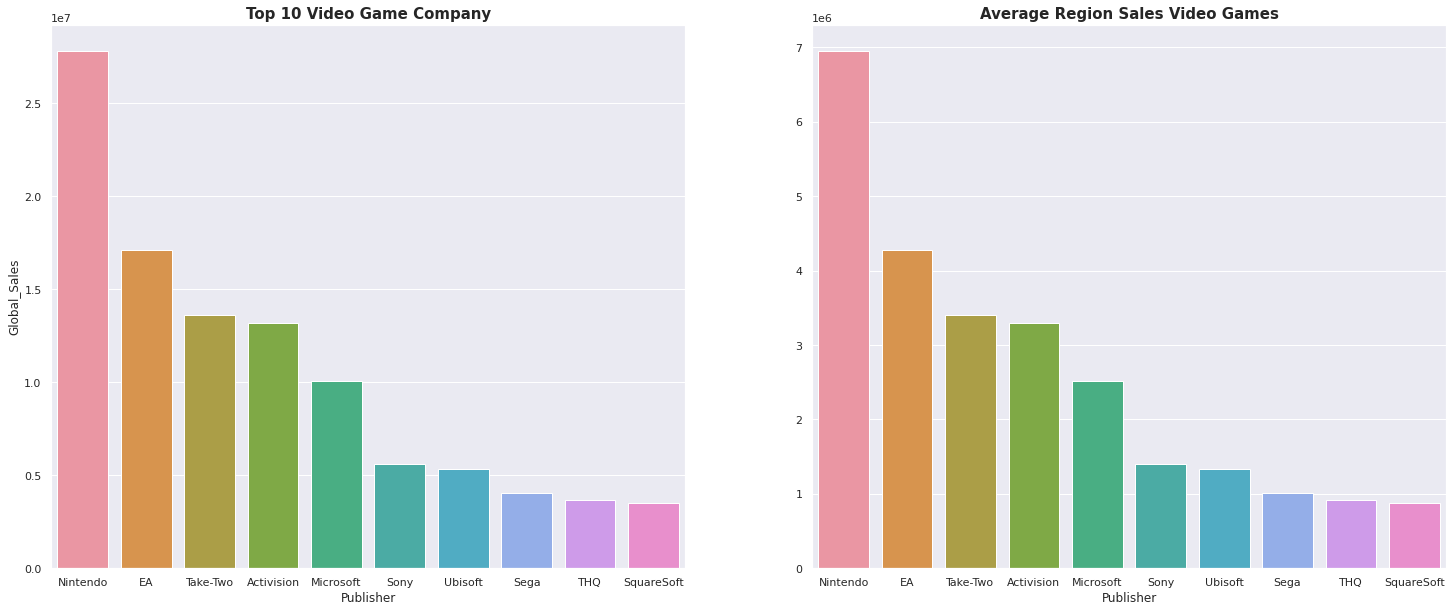

In [234]:
#publisher별 top 10 시각화

fig, ax = plt.subplots(1,2, figsize=(25,10))

sns.barplot(x=publishersum.index, y=publishersum['Global_Sales'], ax=ax[0])
ax[0].set_title('Top 10 Video Game Company', fontsize=15, weight='bold')

sns.barplot(x=publishermean.index, y=publishermean, ax=ax[1])
sns.set_style('darkgrid')
ax[1].set_title('Average Region Sales Video Games', fontsize=15, weight='bold')
plt.show()

In [235]:
#genre 컬럼 변수 설정
genre = df.drop(columns = ['Year','Name','Platform','Publisher'])
genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,0.04,0.00,0.00,0.00,0.04
1,Action,0.17,0.00,0.00,0.01,0.18
2,Adventure,0.00,0.00,0.02,0.00,0.02
3,Misc,0.04,0.00,0.00,0.00,0.04
4,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01,0.20
16594,Action,0.01,0.00,0.00,0.00,0.01
16595,Sports,0.44,0.19,0.03,0.13,0.79
16596,Action,0.05,0.05,0.25,0.03,0.38


In [236]:
#genre별
genrecounts = genre.groupby('Genre').count()
genrecounts = genrecounts.rename(index={'Role-Playing':'Roleplay'})
genrecounts = genrecounts.sort_values('Global_Sales', ascending=False).head(12)
genrecounts

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,3240,3240,3240,3240,3240
Sports,2299,2299,2299,2299,2299
Misc,1681,1681,1681,1681,1681
Roleplay,1465,1465,1465,1465,1465
Shooter,1280,1280,1280,1280,1280
Adventure,1268,1268,1268,1268,1268
Racing,1219,1219,1219,1219,1219
Platform,873,873,873,873,873
Simulation,846,846,846,846,846


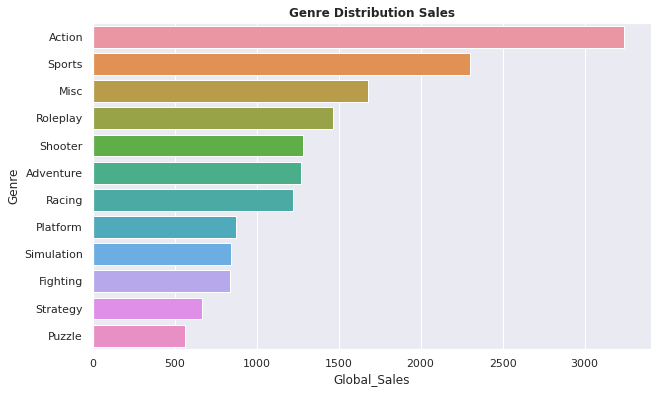

In [237]:
plt.figure(figsize=(10,6))
plt.title("Genre Distribution Sales", weight='bold')
sns.barplot(x=genrecounts['Global_Sales'], y=genrecounts.index)
sns.set_style('darkgrid')

In [238]:
#platform컬럼 변수 설정
platform = df.drop(columns = ['Genre', 'Name','Year','Publisher','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales'])
platform = platform.groupby('Platform').count()
platform = platform.sort_values('Global_Sales', ascending=False)
platform = platform.head(10)

platform

,Global_Sales
Platform,
DS,2127
PS2,2121
PS3,1299
Wii,1284
X360,1231
PSP,1193
PS,1185
PC,935
XB,799


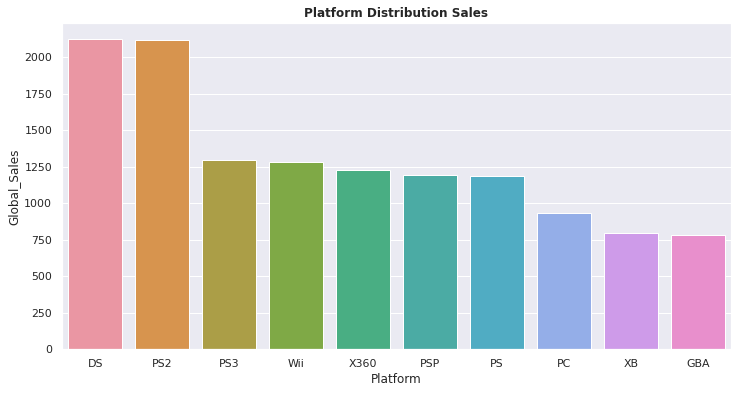

In [239]:
#platform top 10 시각화
plt.figure(figsize=(12,6))
plt.title("Platform Distribution Sales", weight='bold')
diverging_colors = sns.color_palette('hls', 8)
sns.set_palette(diverging_colors)
sns.barplot(x=platform.index, y=platform['Global_Sales'])
sns.set_style('darkgrid')

In [240]:
temp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
temp_grouped = temp_genre.groupby(['Genre']).sum()
temp_table = temp_grouped.reset_index()

temp_table.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,21470837.28,7030506.61,1440155.16,1340182.65,31281681.70
1,Adventure,760101.03,190063.47,80051.79,280016.42,1310232.71
2,Fighting,1360218.99,1420098.48,1340085.80,500035.65,4620438.92
3,Misc,4090390.64,2820205.33,420103.76,460072.18,7790771.91
4,Platform,5220440.16,7620193.01,790129.74,480050.97,14110813.88


In [241]:
temp_melted = pd.melt(temp_table, id_vars=['Genre'], value_vars=temp_table.columns[1:],
                      var_name='Region', value_name='Sales')

is_hype = temp_melted['Genre'] == '-'

subset_df = temp_melted[~is_hype]

print(subset_df.shape)
print()

subset_df.head()

(60, 3)



,Genre,Region,Sales
0,Action,NA_Sales,21470837.28
1,Adventure,NA_Sales,760101.03
2,Fighting,NA_Sales,1360218.99
3,Misc,NA_Sales,4090390.64
4,Platform,NA_Sales,5220440.16


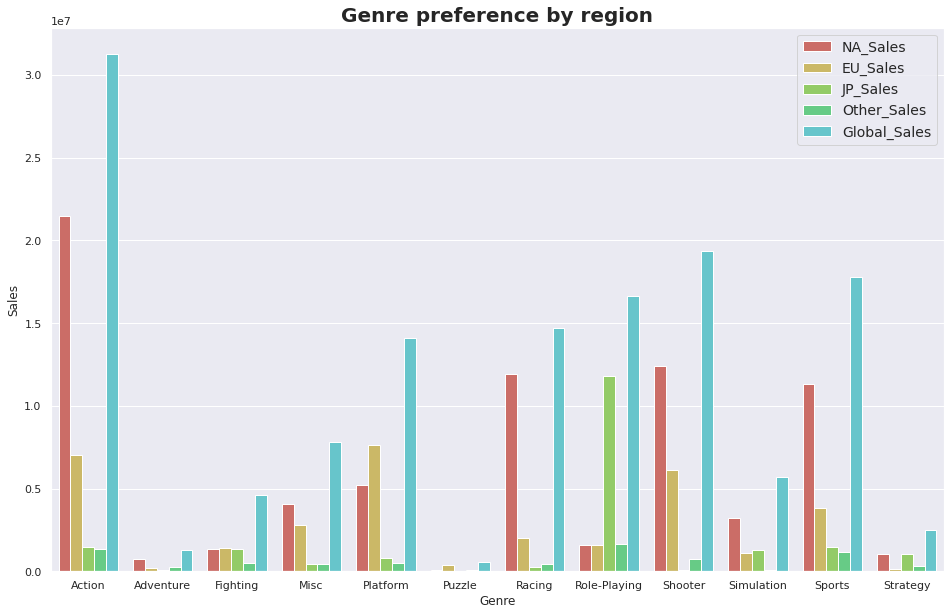

In [242]:
plt.figure(figsize=(16, 10))
sns.barplot(data=subset_df, x='Genre', y='Sales', hue='Region')
plt.title('Genre preference by region', loc='center', fontsize=20, weight='bold')
plt.legend(fontsize=14)
plt.show() #전체, 북미는 액션 장르가 압도적 1위, 일본 롤플레잉 장르 1위가 눈에 띔

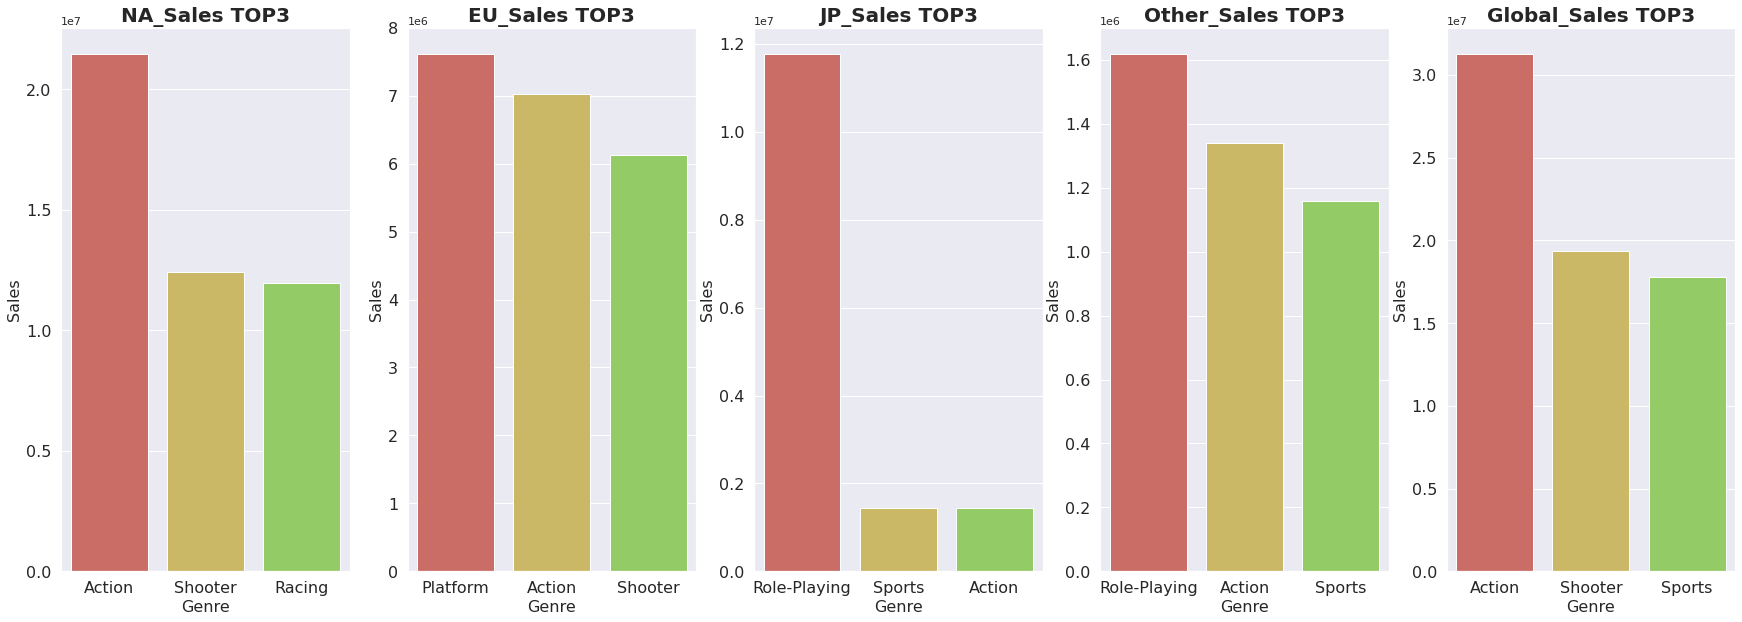

In [243]:
# 국가별 판매량 TOP3
def top3_genre(df, sales_col):
    new_df = df.loc[:, ['Genre', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['Genre', 'Sales']
    return new_df

# Top3 데이터 저장
na_genre_top3 = top3_genre(temp_table, 'NA_Sales')
eu_genre_top3 = top3_genre(temp_table, 'EU_Sales')
jp_genre_top3 = top3_genre(temp_table, 'JP_Sales')
other_genre_top3 = top3_genre(temp_table, 'Other_Sales')
global_genre_top3 = top3_genre(temp_table, 'Global_Sales')

# 데이터 리스트에 담기
data_list = [na_genre_top3, eu_genre_top3, jp_genre_top3, other_genre_top3, global_genre_top3]
columns_list = temp_table.columns[1:]
# 막대 그래프 그리기
fig, axs = plt.subplots(figsize=(30, 10), nrows=1, ncols=5)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=20, weight='bold')
    sns.barplot(x='Genre', y='Sales', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=16)
    axs[i].set_xlabel('Genre', fontsize=16)
    axs[i].set_ylabel('Sales', fontsize=16)
plt.show()

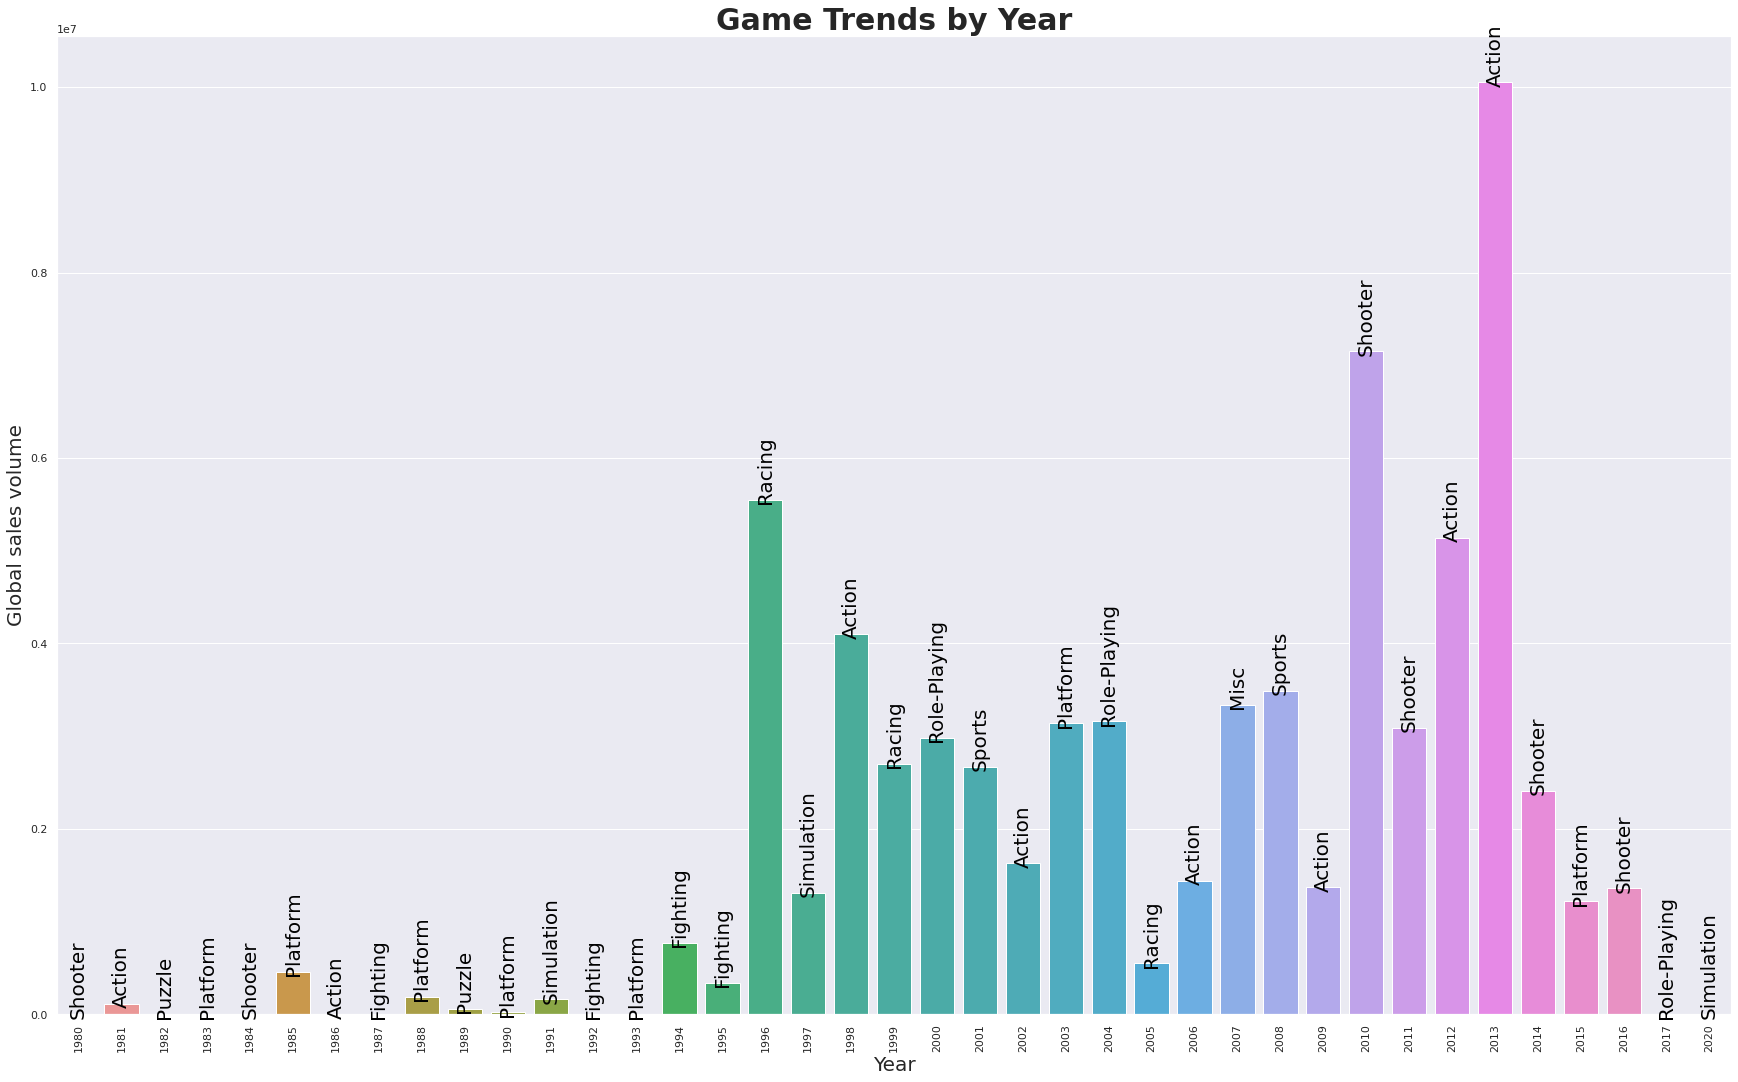

In [244]:
#연도별 게임 트렌드
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index]), color='black', size=20, rotation= 90, ha="center")
    index += 1

plt.title("Game Trends by Year", fontsize=30, weight='bold')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Global sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()

In [245]:
sales_top10 = df.loc[df.Global_Sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x) for x in range(1, 11)]
sales_top10['rank'] = rank
sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rank
0,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,9630006.75,1
1,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78,7030002.84,2
2,Mario Kart 64,N64,1996,Racing,Nintendo,5550000.00,1.94,2.23,0.15,5550004.32,3
3,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.00,1.89,1.45,0.16,4100003.50,4
4,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3150000.00,0.35,3150007.34,5
5,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3120000.00,0.59,3120011.52,6
6,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930000.00,1.25,0.83,0.20,2930002.28,7
7,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2930000.00,0.01,0.46,2930001.39,8
8,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2850000.00,1.91,0.23,2850009.05,9
9,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2780000.00,0.14,2780002.53,10


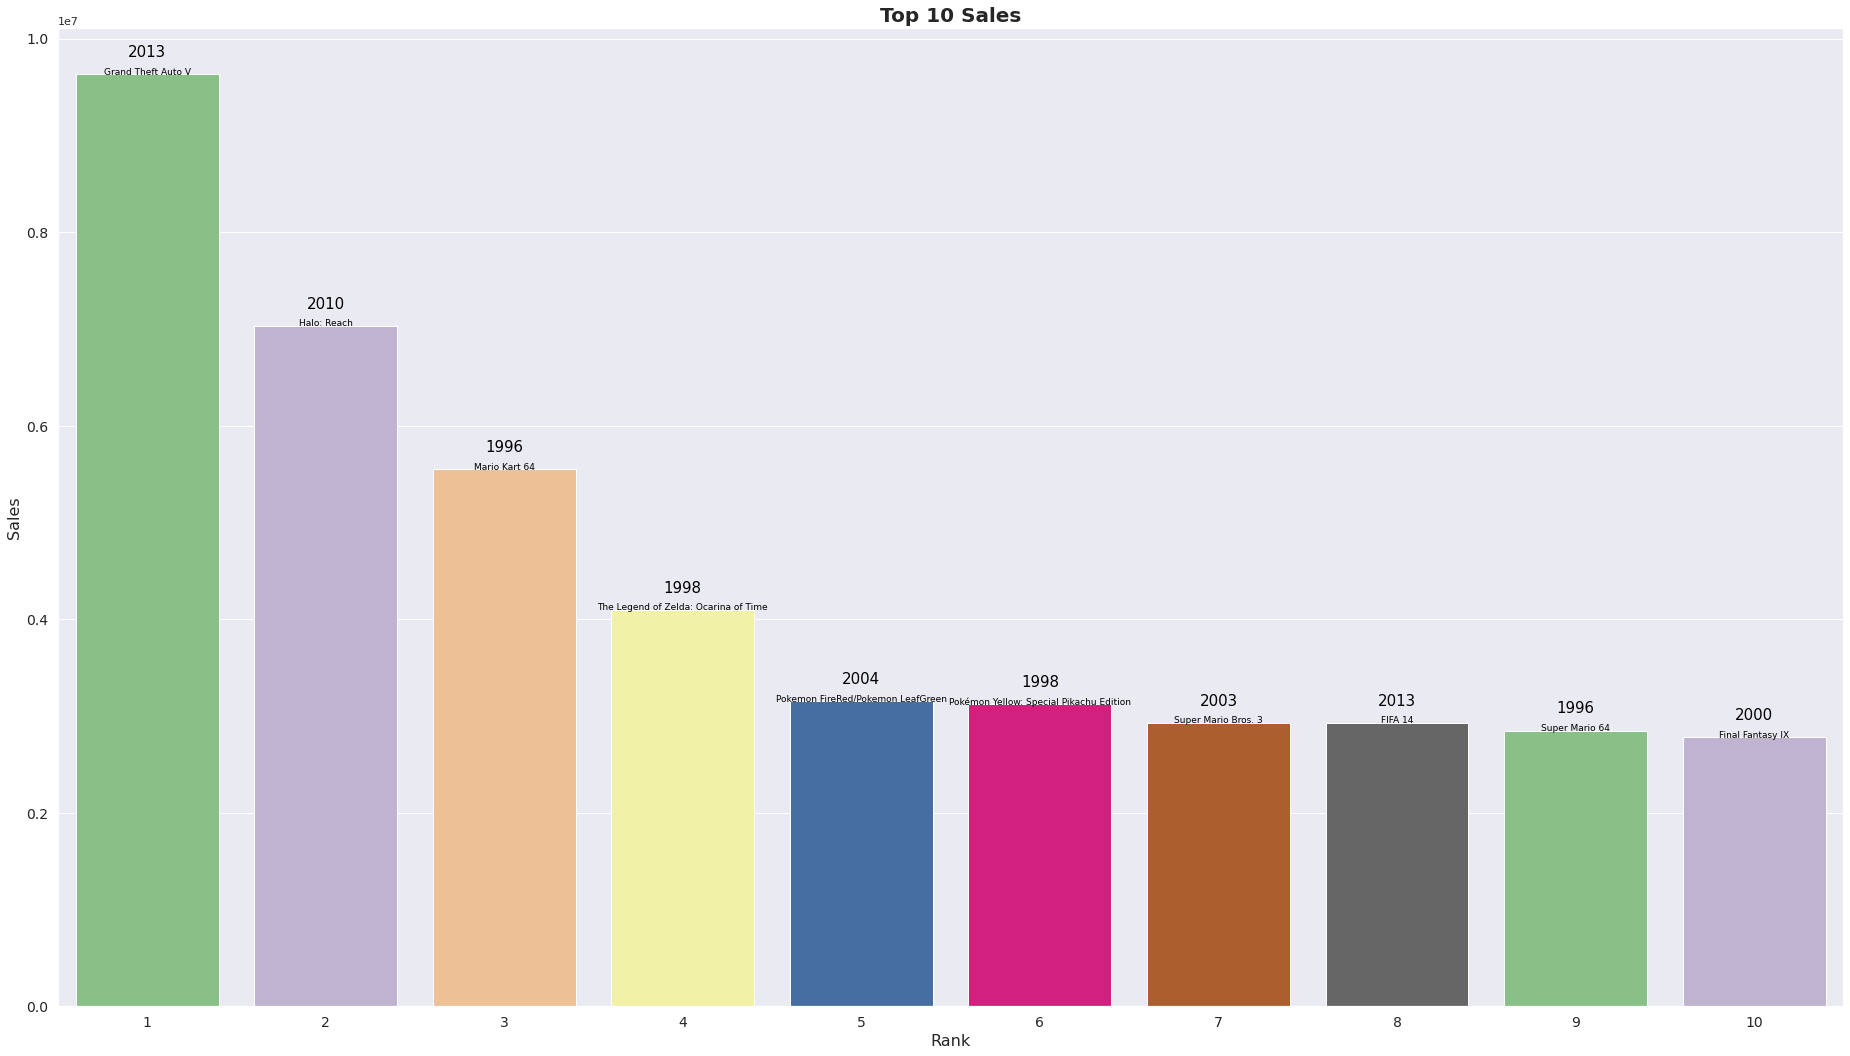

In [246]:
plt.figure(figsize=(32,18))
a = sns.barplot(x='rank', y='Global_Sales', data=sales_top10, palette='Accent')
i = 0
for name, year, val in zip(sales_top10.Name, sales_top10.Year, sales_top10.Global_Sales 
                                                ):
    a.text(x=i, y=val+2, s=(name), color='black', ha='center', fontsize=9)
    a.text(x=i, y=val-8, s=(str(year) + '\n'), color='black', ha='center', fontsize=15)
    i+=1
a.set_title('Top 10 Sales', fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Rank', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show();